<a href="https://colab.research.google.com/github/liliya-ily/cancer/blob/master/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lilyily","key":"81676af7d82503252c257212cf373319"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-21 06:23:33           5955  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3330  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1173  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1919  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [8]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 323M/325M [00:08<00:00, 35.8MB/s]
100% 325M/325M [00:08<00:00, 39.3MB/s]


In [9]:
! mkdir Cancer

In [10]:
! unzip skin-cancer-malignant-vs-benign.zip -d Cance

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Cance/data/train/benign/420.jpg  
  inflating: Cance/data/train/benign/421.jpg  
  inflating: Cance/data/train/benign/422.jpg  
  inflating: Cance/data/train/benign/423.jpg  
  inflating: Cance/data/train/benign/424.jpg  
  inflating: Cance/data/train/benign/425.jpg  
  inflating: Cance/data/train/benign/426.jpg  
  inflating: Cance/data/train/benign/429.jpg  
  inflating: Cance/data/train/benign/43.jpg  
  inflating: Cance/data/train/benign/430.jpg  
  inflating: Cance/data/train/benign/431.jpg  
  inflating: Cance/data/train/benign/432.jpg  
  inflating: Cance/data/train/benign/434.jpg  
  inflating: Cance/data/train/benign/435.jpg  
  inflating: Cance/data/train/benign/438.jpg  
  inflating: Cance/data/train/benign/439.jpg  
  inflating: Cance/data/train/benign/440.jpg  
  inflating: Cance/data/train/benign/441.jpg  
  inflating: Cance/data/train/benign/442.jpg  
  inflating: Cance/data/train/benign/443

In [11]:

import os
from glob import glob
import seaborn as sns
from PIL import Image

from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import os
from torchvision import transforms
from sklearn.metrics import roc_curve, auc

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# folder_benign_train = '/content/input/data/train/benign'
# folder_malignant_train = '/content/input/data/train/malignant'

# folder_benign_test = '/content/input/data/test/benign'
# folder_malignant_test = '/content/input/data/test/malignant'

# read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# # Load in training pictures 
# ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
# X_benign = np.array(ims_benign, dtype='uint8')
# ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
# X_malignant = np.array(ims_malignant, dtype='uint8')

# # Load in testing pictures
# ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
# X_benign_test = np.array(ims_benign, dtype='uint8')
# ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
# X_malignant_test = np.array(ims_malignant, dtype='uint8')

# # Create labels
# y_benign = np.zeros(X_benign.shape[0])
# y_malignant = np.ones(X_malignant.shape[0])

# y_benign_test = np.zeros(X_benign_test.shape[0])
# y_malignant_test = np.ones(X_malignant_test.shape[0])


# # Merge data 
# X_train = np.concatenate((X_benign, X_malignant), axis = 0)
# y_train = np.concatenate((y_benign, y_malignant), axis = 0)

# X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
# y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# # Shuffle data
# s = np.arange(X_train.shape[0])
# np.random.shuffle(s)
# X_train = X_train[s]
# y_train = y_train[s]

# s = np.arange(X_test.shape[0])
# np.random.shuffle(s)
# X_test = X_test[s]
# y_test = y_test[s]

In [13]:
data_transforms = transforms.Compose([
            transforms.RandomRotation(90, resample=PIL.Image.BILINEAR),
            transforms.RandomApply((transforms.RandomHorizontalFlip(.5), 
                                    transforms.RandomVerticalFlip(.5)), p=0.5),
            transforms.ToTensor(), 
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1201: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [15]:
trainset = dset.ImageFolder('/content/Cance/data/train', 
                            transform=data_transforms)
testset = dset.ImageFolder('/content/Cance/data/test', 
                           transform=data_transforms)
data_size = len(trainset.samples)
validation_split = .2
split = int(np.floor(validation_split * data_size))
indices = list(range(data_size))
np.random.shuffle(indices)
batch_size = 8
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         sampler=val_sampler)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [16]:
class Flattener(nn.Module):
    def forward(self, x):
        batch_size, *_ = x.shape
        return x.view(batch_size, -1)

In [17]:
USE_GPU = True

if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

using device: cuda


In [18]:
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs):    
    loss_history = []
    train_history = []
    val_history = []

    for epoch in range(num_epochs):
        model.train() # Enter train mode
        
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
          
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)    
            loss_value = loss(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            _, indices = torch.max(prediction, 1)
            correct_samples += torch.sum(indices == y_gpu)
            total_samples += y.shape[0]
            
            loss_accum += loss_value

        ave_loss = loss_accum / i_step
        train_accuracy = float(correct_samples) / total_samples
        val_accuracy = compute_accuracy(model, val_loader)
        
        loss_history.append(float(ave_loss))
        train_history.append(train_accuracy)
        val_history.append(val_accuracy)
        
        print(f"Average loss: {ave_loss}, \
              Train accuracy: {train_accuracy}, \
              Val accuracy: {val_accuracy}")
        
    return loss_history, train_history, val_history
        
def compute_accuracy(model, loader, auc=False):
    model.eval() 
    correct_samples = 0
    total_samples = 0
    y_true, y_pred = [], []
    for (x, y) in loader:
      
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        prediction = model(x_gpu)    
        indices = torch.argmax(prediction, 1)
        fpr, tpr, _ = roc_curve(y_gpu.cpu().detach().numpy(), indices.cpu().detach().numpy())

        correct_samples += torch.sum(indices == y_gpu)
        total_samples += y_gpu.shape[0]
        accuracy = float(correct_samples) / total_samples
        torch.cuda.get_device_name(0)
        if auc:
            y_true.extend(y_gpu.cpu().detach().numpy())
            y_pred.extend(indices.cpu().detach().numpy())
    if auc:
        return accuracy, y_true, y_pred
    else: 
        return accuracy
    
    

    return accuracy, y_true, y_pred

def loss_accuracy_plot(loss_history, train_history, val_history):
    plt.figure(figsize=(10, 9))
    plt.subplot(311)
#     plt.ylim(bottom=0)
    plt.title("Loss")
    plt.plot(loss_history)
    plt.subplot(312)
    plt.ylim((.5, 1))
    plt.title("Train/validation accuracy")
    plt.plot(train_history, label="train")
    plt.plot(val_history, label="validation")

    plt.legend();

In [19]:
device = torch.device('cuda')
# torch.set_num_threads(16)
print(torch.cuda.get_device_name(0))
nn_model = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(4),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(24),    
            Flattener(),
            nn.Linear(64*2*2, 2),
          )
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
nn_model.type(torch.cuda.FloatTensor)

nn_model.to(device)

loss = nn.CrossEntropyLoss().type(torch.cuda.FloatTensor)

# optimizer = optim.SGD(nn_model.parameters(), lr=1e-3, weight_decay=1e-4)
optimizer = optim.Adam(nn_model.parameters(), lr=0.001, 
                       betas=(0.9, 0.999), eps=1e-08, 
                       weight_decay=0.0001, amsgrad=False)

Tesla K80


Average loss: 0.5683526396751404,               Train accuracy: 0.723696682464455,               Val accuracy: 0.7817836812144212
Average loss: 0.4569556713104248,               Train accuracy: 0.7753554502369668,               Val accuracy: 0.7020872865275142


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Average loss: 0.43832048773765564,               Train accuracy: 0.7995260663507109,               Val accuracy: 0.8273244781783681
Average loss: 0.40027445554733276,               Train accuracy: 0.8151658767772512,               Val accuracy: 0.8026565464895635
Average loss: 0.3924909234046936,               Train accuracy: 0.819431279620853,               Val accuracy: 0.8273244781783681


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


Average loss: 0.3858584761619568,               Train accuracy: 0.828436018957346,               Val accuracy: 0.7950664136622391
Average loss: 0.3759813606739044,               Train accuracy: 0.8336492890995261,               Val accuracy: 0.8102466793168881
Average loss: 0.36074042320251465,               Train accuracy: 0.8417061611374408,               Val accuracy: 0.8368121442125237
Average loss: 0.3671227693557739,               Train accuracy: 0.8279620853080568,               Val accuracy: 0.8368121442125237
Average loss: 0.34641268849372864,               Train accuracy: 0.8398104265402844,               Val accuracy: 0.74573055028463
Average loss: 0.36328864097595215,               Train accuracy: 0.8322274881516588,               Val accuracy: 0.777988614800759
Average loss: 0.36068540811538696,               Train accuracy: 0.828436018957346,               Val accuracy: 0.8425047438330171
Average loss: 0.341653972864151,               Train accuracy: 0.8450236966824645,  

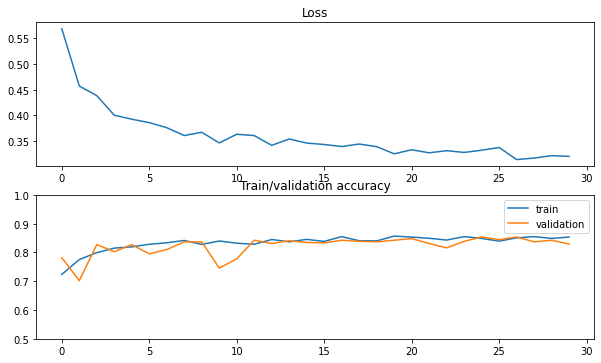

In [20]:
loss_history, train_history, val_history = train_model(nn_model, 
                                                       train_loader, 
                                                       val_loader, 
                                                       loss, 
                                                       optimizer, 30)
loss_accuracy_plot(loss_history, train_history, val_history)
print('Finished!')

test_accuracy, y_true, y_pred = compute_accuracy(nn_model, test_loader, auc=True)

fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_rate = auc(fpr, tpr)


print(f'Final accuracy on the test set is: {test_accuracy}; auc is: {auc_rate}')

In [22]:
test_accuracy, y_true, y_pred = compute_accuracy(nn_model, test_loader, auc=True)

fpr, tpr, _ = roc_curve(y_true, y_pred)
auc_rate = auc(fpr, tpr)


print(f'Final accuracy on the test set is: {test_accuracy}; auc is: {auc_rate}')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


Final accuracy on the test set is: 0.8363636363636363; auc is: 0.8461111111111111


In [27]:
image_size = (224, 244)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Cance/data/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Cance/data/test",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.
Found 660 files belonging to 2 classes.
Using 132 files for validation.


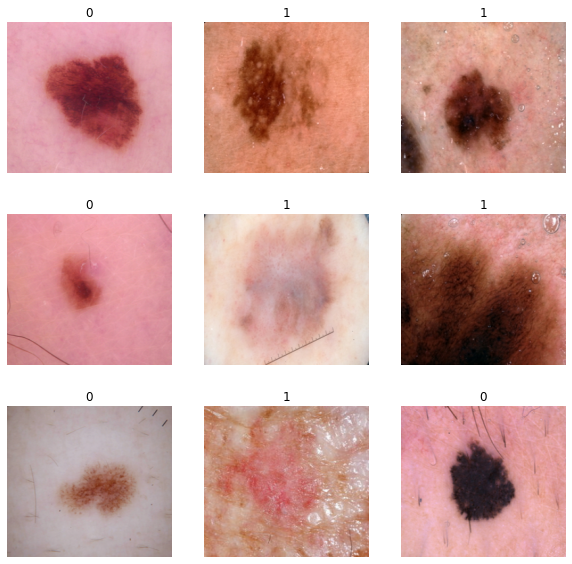

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [29]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

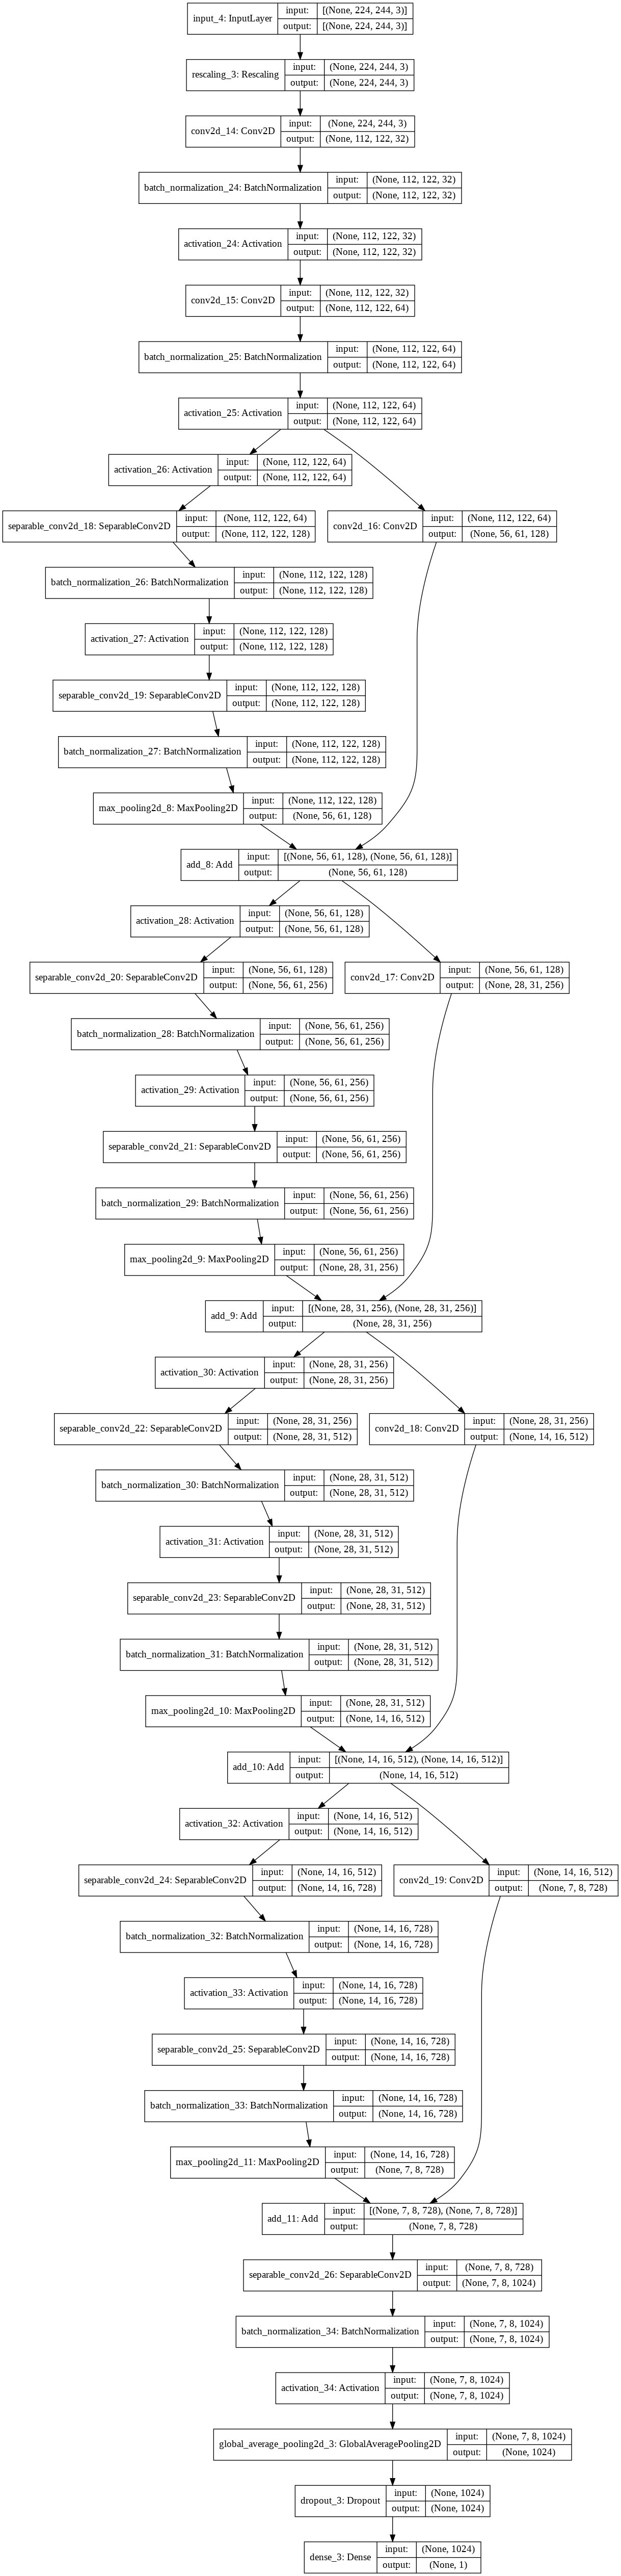

In [38]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = inputs

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [39]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50
66/66 [==============================] - 58s 841ms/step - loss: 0.5182 - accuracy: 0.7531 - val_loss: 0.7103 - val_accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
66/66 [==============================] - 52s 789ms/step - loss: 0.4405 - accuracy: 0.7848 - val_loss: 0.8635 - val_accuracy: 0.5000
Epoch 3/50
66/66 [==============================] - 52s 789ms/step - loss: 0.4037 - accuracy: 0.8028 - val_loss: 0.9857 - val_accuracy: 0.5000
Epoch 4/50
66/66 [==============================] - 53s 793ms/step - loss: 0.3850 - accuracy: 0.8114 - val_loss: 1.2402 - val_accuracy: 0.5000
Epoch 5/50
66/66 [==============================] - 53s 791ms/step - loss: 0.3847 - accuracy: 0.8147 - val_loss: 1.2425 - val_accuracy: 0.5000
Epoch 6/50
66/66 [==============================] - 53s 791ms/step - loss: 0.3543 - accuracy: 0.8479 - val_loss: 1.5983 - val_accuracy: 0.5000
Epoch 7/50
66/66 [==============================] - 53s 788ms/step - loss: 0.3483 - accuracy: 0.8360 - val_loss: 1.1858 - val_accuracy: 0.5076
Epoch 8/50
66/66 [==============================] - 52s 790ms/step - loss: 0.3231 - accuracy: 0.8545 - val_loss: 0.7625 - val_accuracy: 0.5076

In [51]:
# img = keras.preprocessing.image.load_img(
#     "/content/Cance/data/test/benign/1350.jpg", target_size=image_size
# )
img = keras.preprocessing.image.load_img(
    "/content/Cance/data/test/malignant/1336.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent bening and %.2f percent malgnant."
    % (100 * (1 - score), 100 * score)
)

This image is 11.28 percent bening and 88.72 percent malgnant.
